데이터 전처리

In [2]:
import pandas as pd

In [3]:
game=pd.read_csv('../data/vgsales.csv', usecols=[2,4,5,6,7,8,10])
game

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
1,NES,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
4,GB,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [4]:
game.isna().sum()

Platform         0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Global_Sales     0
dtype: int64

In [5]:
game=game.dropna()
game

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
1,NES,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
4,GB,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


platforms_to_keep = ['X360', 'XOne', 'XB',  # Xbox 계열

                     'PS2', 'PS3', 'PS4', 'PS', 'PSP', 'PSV',  # PlayStation 계열
                     
                     'Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'SNES', 'NES', 'N64', 'GC']   #Nintendo 계열

In [6]:
for i in game['Platform']:
    if i in ('X360', 'XOne', 'XB','Xbox'):
      game['Platform'].replace(i, 'Xbox', inplace=True)
    elif i in ('PS2', 'PS3', 'PS4', 'PS', 'PSP', 'PSV','PlayStation'):
      game['Platform'].replace(i, 'PlayStation', inplace=True)
    elif i in ('Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'SNES', 'NES', 'N64', 'GC','Nintendo'):
      game['Platform'].replace(i, 'Nintendo', inplace=True)
    else:
      game['Platform'].replace(i, 'Other', inplace=True)

game

C:\Users\desktop\AppData\Local\Temp\ipykernel_9152\970802486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['Platform'].replace(i, 'Nintendo', inplace=True)
C:\Users\desktop\AppData\Local\Temp\ipykernel_9152\970802486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['Platform'].replace(i, 'Xbox', inplace=True)
C:\Users\desktop\AppData\Local\Temp\ipykernel_9152\970802486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PlayStation,Racing,Activision,0.00,0.00,0.00,0.01
16596,Nintendo,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [7]:
game.value_counts('Platform')

Platform
PlayStation    6636
Nintendo       6236
Xbox           2298
Other          1370
Name: count, dtype: int64

In [8]:
for i in game.columns:
    print(i,game[i].unique())

Platform ['Nintendo' 'Xbox' 'PlayStation' 'Other']
Genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Publisher ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Te

In [9]:
game[game['Publisher'] == 'Unknown']['Publisher'].value_counts()

Publisher
Unknown    203
Name: count, dtype: int64

In [10]:
game.drop(game[game['Publisher'] == 'Unknown'].index, inplace=True)
game

C:\Users\desktop\AppData\Local\Temp\ipykernel_9152\2312479397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game.drop(game[game['Publisher'] == 'Unknown'].index, inplace=True)


,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PlayStation,Racing,Activision,0.00,0.00,0.00,0.01
16596,Nintendo,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [11]:
publisher_count = game['Publisher'].value_counts()
popular_publisher = publisher_count[publisher_count > 15].index
game_df = game[game['Publisher'].isin(popular_publisher)]
game_df

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16591,Other,Adventure,Ubisoft,0.01,0.00,0.00,0.01
16592,Nintendo,Simulation,Destineer,0.01,0.00,0.00,0.01
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01


In [12]:
game_df.value_counts('Publisher')

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
GSP                               16
Hasbro Interactive                16
UFO Interactive                   16
Imagineer                         16
Mastiff                           16
Name: count, Length: 110, dtype: int64

feature/target 분리

In [13]:
feature_df=game_df.drop('Platform',axis=1)
target_sr=game_df['Platform']

인코딩
- feature: 원 핫 인코딩
- target: 라벨 인코딩

In [14]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [15]:
label=LabelEncoder()
label.fit(target_sr)

LabelEncoder()

In [16]:
target_label=label.transform(target_sr)
target_label

array([0, 0, 0, ..., 0, 0, 2])

In [17]:
feature_ohe=pd.get_dummies(feature_df)
feature_ohe

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Publisher_Tomy Corporation,Publisher_UFO Interactive,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games
0,41.49,29.02,3.77,82.74,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,29.08,3.58,6.81,40.24,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,15.85,12.88,3.79,35.82,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15.75,11.01,3.28,33.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11.27,8.89,10.22,31.37,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,0.01,0.00,0.00,0.01,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
16592,0.01,0.00,0.00,0.01,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16593,0.01,0.00,0.00,0.01,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
16594,0.01,0.00,0.00,0.01,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


학습용 데이터 셋 준비

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(feature_ohe,target_label,test_size=0.2,random_state=0,stratify=target_sr)

스케일링

In [20]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(x_train)

scaled_train=ss.transform(x_train)
scaled_test=ss.transform(x_test)

학습 진행: 로지스틱 회귀

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr=LogisticRegression()
lr.fit(scaled_train,y_train)

c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
train_score=lr.score(scaled_train,y_train)
test_score=lr.score(scaled_test,y_test)

print(f'train_score: {train_score}, test_score: {test_score}')

train_score: 0.6196643094487518, test_score: 0.6126064735945486


In [24]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [25]:
lr_pred=lr.predict(scaled_test)
lr_pred_proba=lr.predict_proba(scaled_test)

In [26]:
print('accuracy:{0:.3f},roc_auc:{1:.3f}'.format(accuracy_score(y_test,lr_pred),
                                                roc_auc_score(y_test,lr_pred_proba,multi_class='ovr')))

accuracy:0.613,roc_auc:0.813


In [27]:
from sklearn.metrics import confusion_matrix,classification_report


In [28]:
confusion_matrix(y_test, lr_pred)

array([[772,  17, 287,  40],
       [ 63,  51,  82,  25],
       [231,  15, 873,  48],
       [150,  15, 164, 102]], dtype=int64)

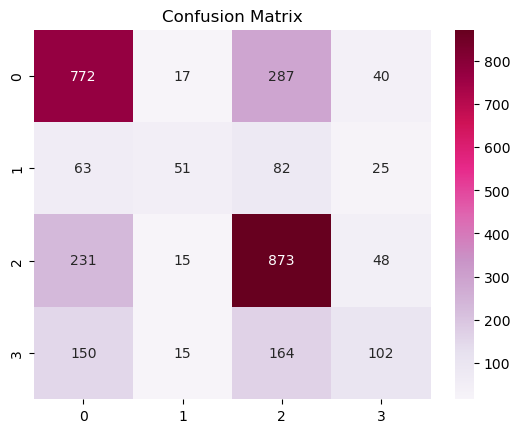

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1116
           1       0.52      0.23      0.32       221
           2       0.62      0.75      0.68      1167
           3       0.47      0.24      0.32       431

    accuracy                           0.61      2935
   macro avg       0.56      0.48      0.49      2935
weighted avg       0.60      0.61      0.59      2935



In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm=confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='PuRd')
plt.title("Confusion Matrix")
plt.show()

class_report=classification_report(y_test, lr_pred)
print(class_report)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
params={'penalty':['l2','l1'],
        'C':[570,575,579],
        'solver':['lbfgs','liblinear','newton-cg','sag','saga']}

lr_clf=LogisticRegression()

grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(scaled_train,y_train)
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_,
                                                                grid_clf.best_score_))

c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [ ]:
lr2=LogisticRegression(C=575,penalty='l2',solver='lbfgs')
lr2.fit(scaled_train,y_train)

train_score=lr2.score(scaled_train,y_train)
test_score=lr2.score(scaled_test,y_test)

print(f'train_score: {train_score}, test_score: {test_score}')

train_score: 0.636789639601261, test_score: 0.6190800681431005


c:\Users\desktop\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
